In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('Vehicle.csv')

In [3]:
df

origin  cylinders  displacement horsepower  weight  acceleration  year  \
0         1          8         307.0        130    3504          12.0  1970   
1         1          8         350.0        165    3693          11.5  1970   
2         1          8         318.0        150    3436          11.0  1970   
3         1          8         304.0        150    3433          12.0  1970   
4         1          8         302.0        140    3449          10.5  1970   
..      ...        ...           ...        ...     ...           ...   ...   
393       1          4         140.0         86    2790          15.6  1982   
394       2          4          97.0         52    2130          24.6  1982   
395       1          4         135.0         84    2295          11.6  1982   
396       1          4         120.0         79    2625          18.6  1982   
397       1          4         119.0         82    2720          19.4  1982   

                          name  Kilometer_per_liter  
0    chevrolet chevelle malibu             7.652587  
1            buick skylark 320             6.377156  
2           plymouth satellite             7.652587  
3                amc rebel sst             6.802299  
4                  ford torino             7.227443  
..                         ...                  ...  
393            ford mustang gl            11.478880  
394                  vw pickup            18.706323  
395              dodge rampage            13.604599  
396                ford ranger            11.904024  
397                 chevy s-10            13.179455  

[398 rows x 9 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   origin               398 non-null    int64  
 1   cylinders            398 non-null    int64  
 2   displacement         398 non-null    float64
 3   horsepower           398 non-null    object 
 4   weight               398 non-null    int64  
 5   acceleration         398 non-null    float64
 6   year                 398 non-null    int64  
 7   name                 398 non-null    object 
 8   Kilometer_per_liter  398 non-null    float64
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [5]:
df.describe().T

count         mean         std          min          25%  \
origin               398.0     1.572864    0.802055     1.000000     1.000000   
cylinders            398.0     5.454774    1.701004     3.000000     4.000000   
displacement         398.0   193.425879  104.269838    68.000000   104.250000   
weight               398.0  2970.424623  846.841774  1613.000000  2223.750000   
acceleration         398.0    15.568090    2.757689     8.000000    13.825000   
year                 398.0  1976.010050    3.697627  1970.000000  1973.000000   
Kilometer_per_liter  398.0     9.997073    3.322917     3.826293     7.440015   

                             50%          75%          max  
origin                  1.000000     2.000000     3.000000  
cylinders               4.000000     8.000000     8.000000  
displacement          148.500000   262.000000   455.000000  
weight               2803.500000  3608.000000  5140.000000  
acceleration           15.500000    17.175000    24.800000  
year                 1976.000000  1979.000000  1982.000000  
Kilometer_per_liter     9.778305    12.329168    19.811697

In [6]:
df.describe(include='O')

horsepower        name
count         398         398
unique         94         305
top           150  ford pinto
freq           22           6

In [7]:
# here the horse power and name has 94 and 305 unique values
# we need to change the datatypes

In [8]:
df.horsepower = df.horsepower.astype(float)

ValueError: could not convert string to float: '?'

In [ ]:
# we have some characters in the horsepower feature

In [9]:
df.horsepower.unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [10]:
df.horsepower.value_counts().head(20)

150    22
90     20
88     19
110    18
100    17
95     14
75     14
70     12
105    12
67     12
65     10
85      9
97      9
80      7
140     7
145     7
78      6
72      6
84      6
68      6
Name: horsepower, dtype: int64

In [11]:
# only 6 "?" characters are present
# we will remove records having those characters

df = df[df['horsepower'] != '?']

In [12]:
df.shape

(392, 9)

In [13]:
df.horsepower = df.horsepower.astype(float)

c:\users\sidu1\anaconda3\envs\msanalytics\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [14]:
df.nunique()

origin                   3
cylinders                5
displacement            81
horsepower              93
weight                 346
acceleration            95
year                    13
name                   301
Kilometer_per_liter    127
dtype: int64

In [15]:
# orgin datatype is int but it has only three unique values

df.origin.value_counts()

1    245
3     79
2     68
Name: origin, dtype: int64

In [16]:
df.origin = df.origin.astype(object)

In [17]:
df.origin.dtypes

dtype('O')

In [18]:
df.cylinders.value_counts()

4    199
8    103
6     83
3      4
5      3
Name: cylinders, dtype: int64

In [19]:
df.cylinders = df.cylinders.astype(object)

In [20]:
df.cylinders.dtypes

dtype('O')

In [21]:
df.year.nunique()

13

In [22]:
# we will create a new feature called vehicle age by separating vehicle year from current year

import datetime as dt

In [23]:
current_year = int(dt.datetime.now().year)
df['Vehicle_Age'] = current_year - df['year']

# drop the year feature as it is of no use

df.drop(['year'], axis = 1, inplace = True)

<ipython-input-23-b625656f1c73>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Vehicle_Age'] = current_year - df['year']
c:\users\sidu1\anaconda3\envs\msanalytics\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [24]:
df.Kilometer_per_liter.nunique()

127

In [25]:
df = df.rename(columns = {'Kilometer_per_liter' : 'Km/l'})

In [26]:
df

origin cylinders  displacement  horsepower  weight  acceleration  \
0        1         8         307.0       130.0    3504          12.0   
1        1         8         350.0       165.0    3693          11.5   
2        1         8         318.0       150.0    3436          11.0   
3        1         8         304.0       150.0    3433          12.0   
4        1         8         302.0       140.0    3449          10.5   
..     ...       ...           ...         ...     ...           ...   
393      1         4         140.0        86.0    2790          15.6   
394      2         4          97.0        52.0    2130          24.6   
395      1         4         135.0        84.0    2295          11.6   
396      1         4         120.0        79.0    2625          18.6   
397      1         4         119.0        82.0    2720          19.4   

                          name       Km/l  Vehicle_Age  
0    chevrolet chevelle malibu   7.652587           51  
1            buick skylark 320   6.377156           51  
2           plymouth satellite   7.652587           51  
3                amc rebel sst   6.802299           51  
4                  ford torino   7.227443           51  
..                         ...        ...          ...  
393            ford mustang gl  11.478880           39  
394                  vw pickup  18.706323           39  
395              dodge rampage  13.604599           39  
396                ford ranger  11.904024           39  
397                 chevy s-10  13.179455           39  

[392 rows x 9 columns]

In [27]:
df.name

0      chevrolet chevelle malibu
1              buick skylark 320
2             plymouth satellite
3                  amc rebel sst
4                    ford torino
                 ...            
393              ford mustang gl
394                    vw pickup
395                dodge rampage
396                  ford ranger
397                   chevy s-10
Name: name, Length: 392, dtype: object

In [28]:
# the datatype of name feature is object and there are 305 unique values
# we will extract the company name alone

df.name = df.name.apply(lambda x : x[:x.find(' ')])

In [29]:
df.name.unique()

array(['chevrolet', 'buick', 'plymouth', 'amc', 'ford', 'pontiac',
       'dodge', 'toyota', 'datsun', 'volkswagen', 'peugeot', 'audi',
       'saab', 'bmw', 'chevy', 'hi', 'mercury', 'opel', 'fiat',
       'oldsmobile', 'chrysler', 'mazda', 'volvo', 'renault', 'toyouta',
       'maxda', 'honda', 'subar', 'chevroelt', 'capri', 'vw',
       'mercedes-benz', 'cadillac', 'subaru', 'mercedes', 'vokswagen',
       'triumph', 'nissan'], dtype=object)

In [30]:
df.name.value_counts()

ford             48
chevrolet        43
plymouth         31
dodge            28
amc              27
toyota           25
datsun           23
buick            17
pontiac          16
volkswagen       15
honda            13
mercury          11
oldsmobile       10
mazda            10
fiat              8
peugeot           8
audi              7
chrysler          6
volvo             6
vw                6
opel              4
saab              4
renault           3
chevy             3
mercedes-benz     2
bmw               2
subar             2
maxda             2
cadillac          2
subaru            2
chevroelt         1
mercedes          1
hi                1
nissan            1
vokswagen         1
triumph           1
capri             1
toyouta           1
Name: name, dtype: int64

In [31]:
df.name.nunique()

38

In [32]:
# There are several errors in the manufacturers names. 
# E.g. «vokswagen», «maxda» etc. We fix these by replacing the wrong entries. We also fix some synomyms like «vw».

errors = {
         "vokswagen" : "volkswagen", 
         "vw" : "volkswagen", 
         "toyouta" : "toyota", 
         "mercedes-benz" : "mercedes", 
         "chevroelt": "chevrolet",
         "chevy" : "chevrolet", 
         "maxda" : "mazda",
         "subar" : "subaru"
}

df.name = df.name.map(errors).fillna(df.name)

In [33]:
df.name.value_counts()

ford          48
chevrolet     47
plymouth      31
dodge         28
amc           27
toyota        26
datsun        23
volkswagen    22
buick         17
pontiac       16
honda         13
mazda         12
mercury       11
oldsmobile    10
fiat           8
peugeot        8
audi           7
volvo          6
chrysler       6
saab           4
opel           4
subaru         4
mercedes       3
renault        3
cadillac       2
bmw            2
hi             1
nissan         1
capri          1
triumph        1
Name: name, dtype: int64

In [34]:
# we will group the cars having value _counts less than 10 as others

need=df['name'].value_counts().index[14:]

need

Index(['fiat', 'peugeot', 'audi', 'volvo', 'chrysler', 'saab', 'opel',
       'subaru', 'mercedes', 'renault', 'cadillac', 'bmw', 'hi', 'nissan',
       'capri', 'triumph'],
      dtype='object')

In [35]:
df['name']=np.where(df['name'].isin(need),'others',df['name'])

In [36]:
df['name'].value_counts()

others        61
ford          48
chevrolet     47
plymouth      31
dodge         28
amc           27
toyota        26
datsun        23
volkswagen    22
buick         17
pontiac       16
honda         13
mazda         12
mercury       11
oldsmobile    10
Name: name, dtype: int64

In [37]:
df['name'].nunique()

15

<AxesSubplot:>

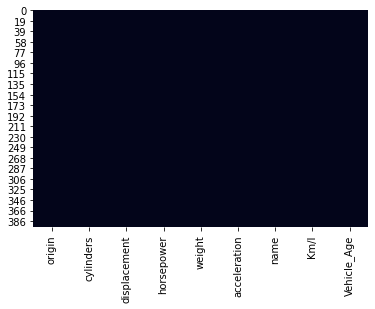

In [38]:
# Visualising null values with heatmap

sns.heatmap(df.isnull(),cbar = False)

In [39]:
# from the graph it can be clearly seen that there are no  null values

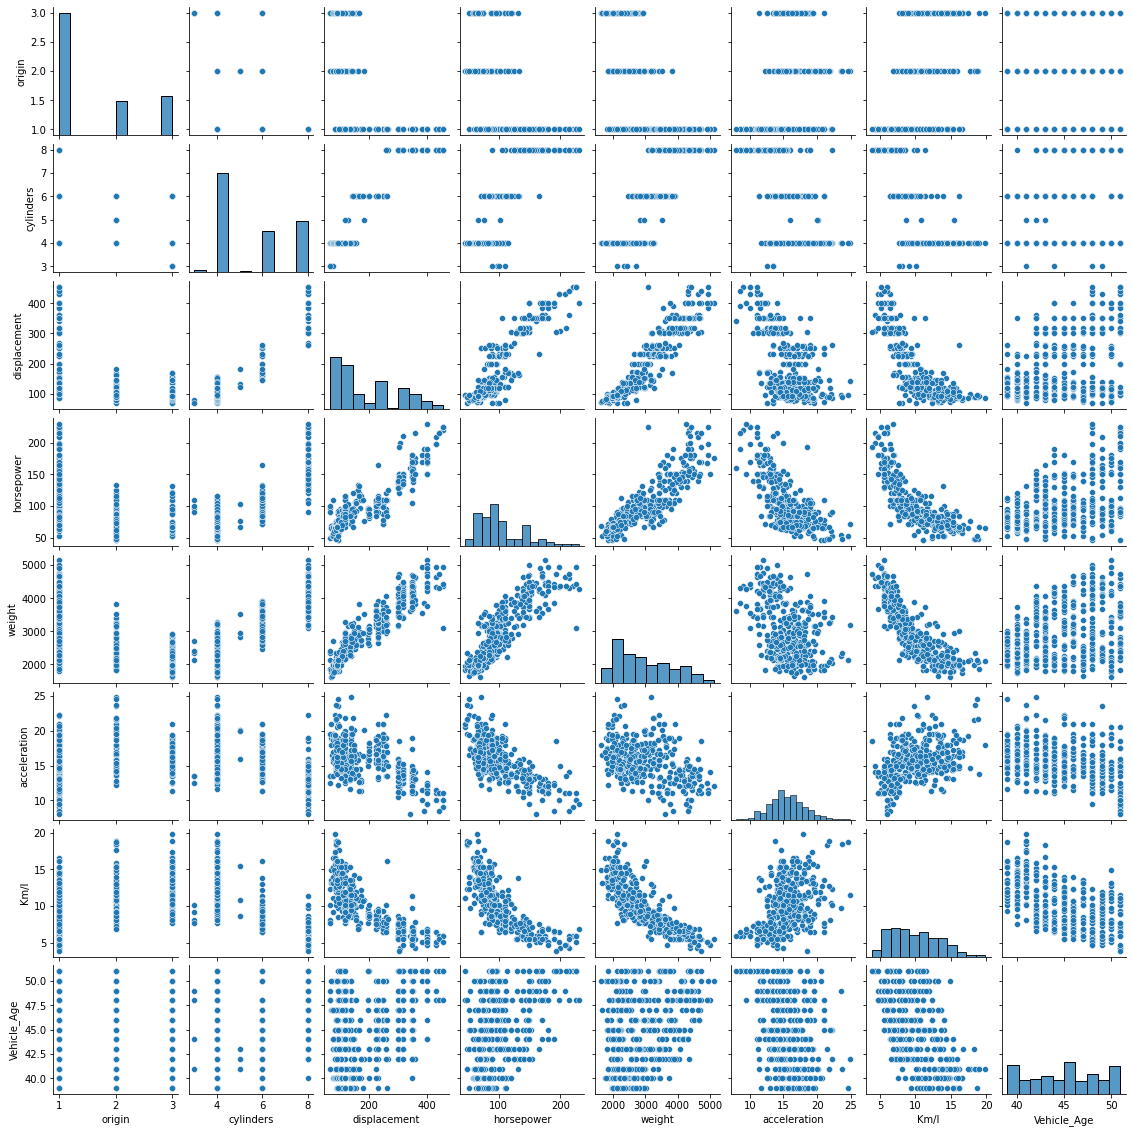

In [40]:
# visualising the distribution of features with pairplot 

sns.pairplot(df, kind= "scatter", height =2)

In [41]:
# from the plot we can say that there are so many discrete columns

In [42]:
numerical_features = [features for features in df.columns if df[features].dtype != 'O' and features != 'Km/l' ]

In [43]:
numerical_features

['displacement', 'horsepower', 'weight', 'acceleration', 'Vehicle_Age']

In [44]:
categorical_features = [features for features in df.columns if df[features].dtype == 'O']

In [45]:
categorical_features

['origin', 'cylinders', 'name']

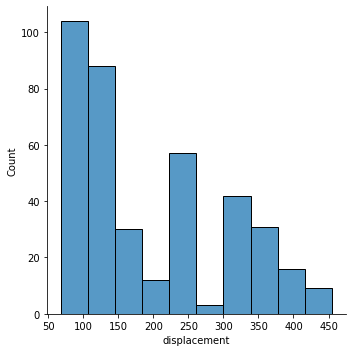

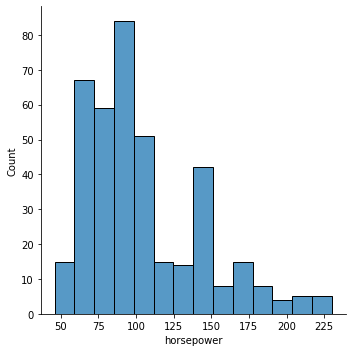

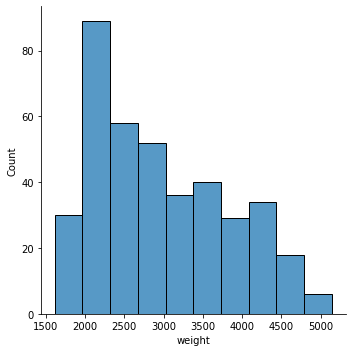

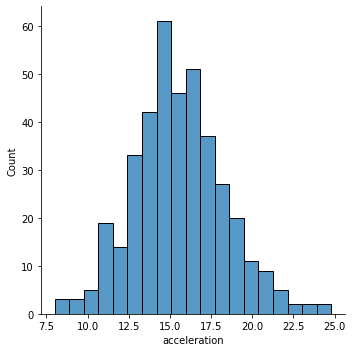

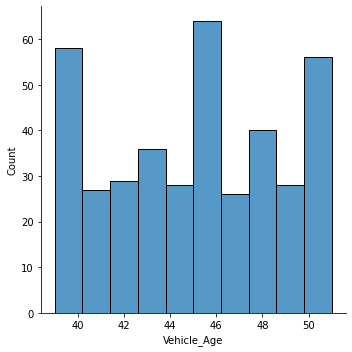

In [46]:
# visualising the numerical features

for feature in numerical_features:
    sns.displot(df[feature])
    plt.show()

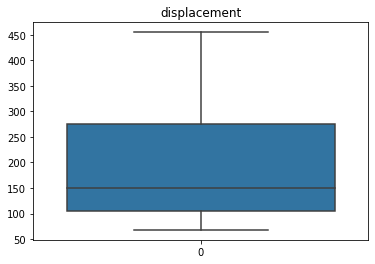

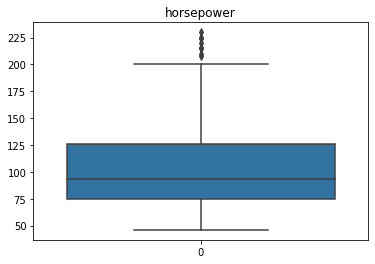

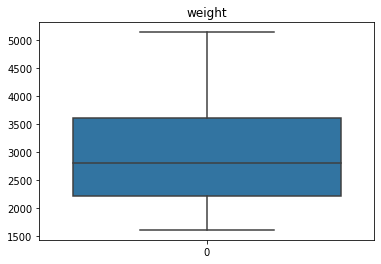

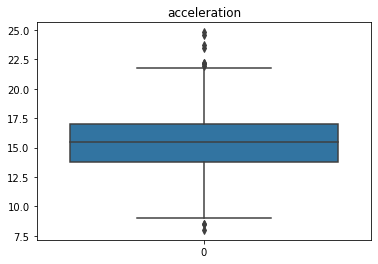

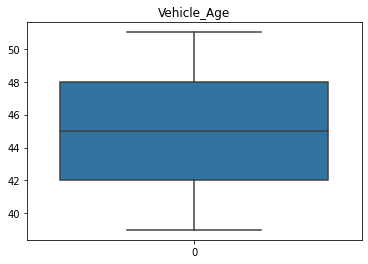

In [47]:
# checking for outliers in the numerical features

for feature in numerical_features:
    sns.boxplot(data = df[feature])
    plt.title(feature)
    plt.show()


In [48]:
# horsepower and acceleration have outliers
# very few outliers are there so need to worry about that, because we are going to use randomforest regressor

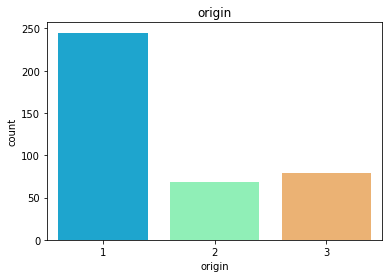

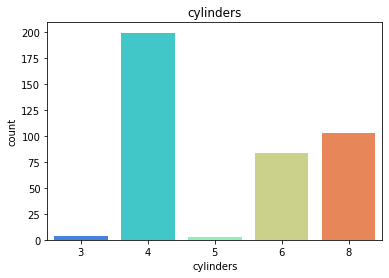

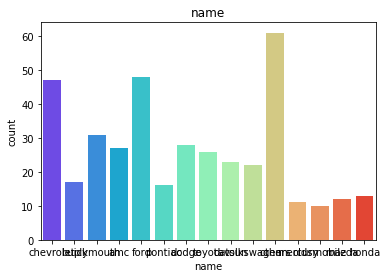

In [49]:
# visualising the categorical features

for feature in categorical_features:
    sns.countplot(x = df[feature], data = df , palette = 'rainbow')
    plt.title(feature)
    plt.show()

<AxesSubplot:>

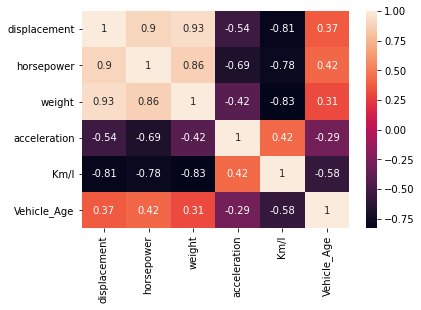

In [50]:
# check the correlation using heatmap

sns.heatmap(df.corr(), annot = True)

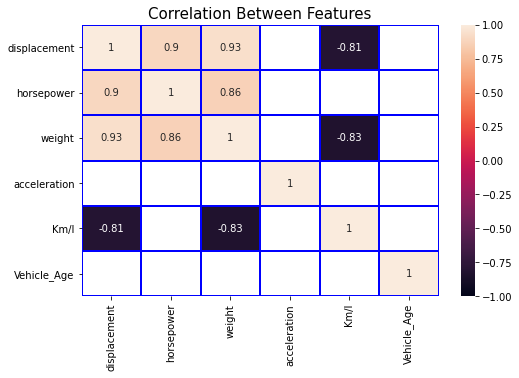

In [51]:
# visualising only the positively and negatively correlated features

correlation=df.corr()
plt.figure(figsize=(8,5))
sns.heatmap(correlation[(correlation >= 0.8) | (correlation <= -0.8)],
            annot=True,linewidths=0.1,linecolor='blue',vmax=1,vmin=-1)
plt.title('Correlation Between Features',fontsize=15)
plt.show()


In [52]:
# correlation does not cause causation

In [53]:
# dummy encoding categorical data

df_final = pd.get_dummies(df, drop_first = True)

In [54]:
df_final

displacement  horsepower  weight  acceleration       Km/l  Vehicle_Age  \
0           307.0       130.0    3504          12.0   7.652587           51   
1           350.0       165.0    3693          11.5   6.377156           51   
2           318.0       150.0    3436          11.0   7.652587           51   
3           304.0       150.0    3433          12.0   6.802299           51   
4           302.0       140.0    3449          10.5   7.227443           51   
..            ...         ...     ...           ...        ...          ...   
393         140.0        86.0    2790          15.6  11.478880           39   
394          97.0        52.0    2130          24.6  18.706323           39   
395         135.0        84.0    2295          11.6  13.604599           39   
396         120.0        79.0    2625          18.6  11.904024           39   
397         119.0        82.0    2720          19.4  13.179455           39   

     origin_2  origin_3  cylinders_4  cylinders_5  ...  name_ford  name_honda  \
0           0         0            0            0  ...          0           0   
1           0         0            0            0  ...          0           0   
2           0         0            0            0  ...          0           0   
3           0         0            0            0  ...          0           0   
4           0         0            0            0  ...          1           0   
..        ...       ...          ...          ...  ...        ...         ...   
393         0         0            1            0  ...          1           0   
394         1         0            1            0  ...          0           0   
395         0         0            1            0  ...          0           0   
396         0         0            1            0  ...          1           0   
397         0         0            1            0  ...          0           0   

     name_mazda  name_mercury  name_oldsmobile  name_others  name_plymouth  \
0             0             0                0            0              0   
1             0             0                0            0              0   
2             0             0                0            0              1   
3             0             0                0            0              0   
4             0             0                0            0              0   
..          ...           ...              ...          ...            ...   
393           0             0                0            0              0   
394           0             0                0            0              0   
395           0             0                0            0              0   
396           0             0                0            0              0   
397           0             0                0            0              0   

     name_pontiac  name_toyota  name_volkswagen  
0               0            0                0  
1               0            0                0  
2               0            0                0  
3               0            0                0  
4               0            0                0  
..            ...          ...              ...  
393             0            0                0  
394             0            0                1  
395             0            0                0  
396             0            0                0  
397             0            0                0  

[392 rows x 26 columns]

In [55]:
df_final.shape

(392, 26)

In [56]:
# finding important features 

x = df_final.drop(['Km/l'] , axis = 1)
y = df_final['Km/l']


In [57]:
from sklearn.ensemble import ExtraTreesRegressor

model = ExtraTreesRegressor()
model.fit(x,y)

ExtraTreesRegressor()

In [58]:

print(model.feature_importances_)

[0.08293986 0.05113564 0.05890047 0.0250014  0.12928377 0.00623071
 0.00789113 0.55563598 0.00161785 0.00120207 0.03947393 0.00076895
 0.00320905 0.00350656 0.00159534 0.00304264 0.00117291 0.002158
 0.00061702 0.01079148 0.0040046  0.00170902 0.00110649 0.00171192
 0.00529321]


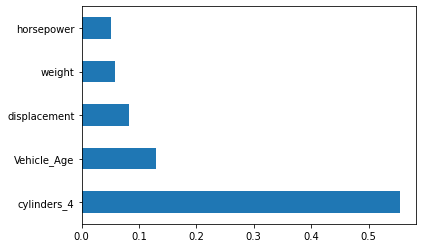

In [59]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [60]:
# train test split

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [61]:
from sklearn.ensemble import RandomForestRegressor

model_1=RandomForestRegressor(n_estimators=100, random_state=10)
model_1.fit(x_train, y_train)

RandomForestRegressor(random_state=10)

In [62]:
# predict the values on test dataset using predict()
y_pred = model_1.predict(x_test)

In [63]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.7940603580965027
MSE: 1.5065366789460461
RMSE: 1.227410558430245


In [64]:
# Hyperparameter tuning

from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [65]:

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [66]:
rf = RandomForestRegressor()

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
model_2 = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', 
                             n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [67]:
model_2.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [68]:
model_2.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [69]:
model_2.best_score_

-1.458706534518768

In [70]:
y_pred2 = model_2.predict(x_test)

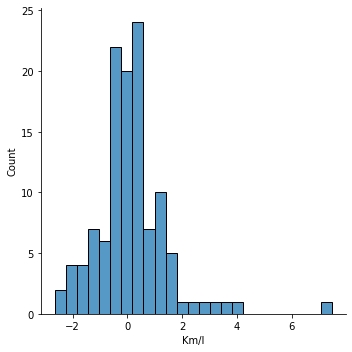

In [71]:
sns.displot(y_test-y_pred2)

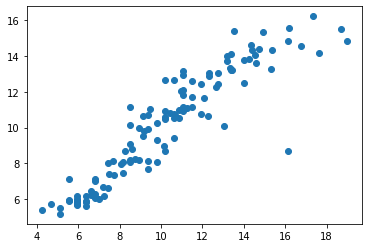

In [72]:
plt.scatter(y_test, y_pred2)

In [73]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred2))
print('MSE:', metrics.mean_squared_error(y_test, y_pred2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred2)))

MAE: 0.8606044156398284
MSE: 1.7005938536447363
RMSE: 1.3040681936328085


In [78]:
MAE1 =  metrics.mean_absolute_error(y_test, y_pred)
MSE1 = metrics.mean_squared_error(y_test, y_pred)
RMSE1 = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
Accuracy1 = metrics.r2_score(y_test, y_pred)

MAE2 =  metrics.mean_absolute_error(y_test, y_pred2)
MSE2 = metrics.mean_squared_error(y_test, y_pred2)
RMSE2 = np.sqrt(metrics.mean_squared_error(y_test, y_pred2))
Accuracy2 = metrics.r2_score(y_test, y_pred2)

In [80]:
# tabulating results

# create a list of column names
cols = ['Model', 'MAE', 'MSE', 'RMSE', 'Accuracy']

# creating an empty dataframe of the colums
result_tabulation = pd.DataFrame(columns = cols)

# compiling the required information for model_1
model_1_metrics = pd.Series({'Model': "RandomForest",
                 'MAE' : MAE1, 'MSE' : MSE1 , 'RMSE' : RMSE1, 'Accuracy': Accuracy1})

# appending our result table
result_tabulation = result_tabulation.append(model_1_metrics , ignore_index = True)

# view the result table
result_tabulation

Model      MAE       MSE      RMSE  Accuracy
0  RandomForest  0.79406  1.506537  1.227411  0.864505

In [81]:
# compiling the required information for model_2
model_2_metrics = pd.Series({'Model': "RandomForest HT",
                 'MAE' : MAE2, 'MSE' : MSE2 , 'RMSE' : RMSE2, 'Accuracy':Accuracy2})

# appending our result table
result_tabulation = result_tabulation.append(model_2_metrics , ignore_index = True)

# view the result table
result_tabulation

Model       MAE       MSE      RMSE  Accuracy
0     RandomForest  0.794060  1.506537  1.227411  0.864505
1  RandomForest HT  0.860604  1.700594  1.304068  0.847052

In [82]:
!pip install xgboost

In [83]:
import xgboost as xg

# Instantiation
model_3 = xg.XGBRegressor(objective ='reg:linear',
                  n_estimators = 10, seed = 123)
  
# Fitting the model
model_3.fit(x_train, y_train)
  

[22:14:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=10, n_jobs=4, num_parallel_tree=1,
             objective='reg:linear', random_state=123, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, seed=123, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [84]:
# Predict the model
y_pred3 = model_3.predict(x_test)

c:\users\sidu1\anaconda3\envs\msanalytics\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


In [85]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred3))
print('MSE:', metrics.mean_squared_error(y_test, y_pred3))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred3)))

MAE: 0.9653382897963554
MSE: 2.179080639874638
RMSE: 1.4761709385686463


In [87]:
MAE3 =  metrics.mean_absolute_error(y_test, y_pred3)
MSE3 = metrics.mean_squared_error(y_test, y_pred3)
RMSE3 = np.sqrt(metrics.mean_squared_error(y_test, y_pred3))
Accuracy3 = metrics.r2_score(y_test,y_pred3)

# compiling the required information for model_3
model_3_metrics = pd.Series({'Model': "XgBoost",
                 'MAE' : MAE3, 'MSE' : MSE3 , 'RMSE' : RMSE3, 'Accuracy': Accuracy3})

# appending our result table
result_tabulation = result_tabulation.append(model_3_metrics , ignore_index = True)

# view the result table
result_tabulation

Model       MAE       MSE      RMSE  Accuracy
0     RandomForest  0.794060  1.506537  1.227411  0.864505
1  RandomForest HT  0.860604  1.700594  1.304068  0.847052
2          XgBoost  0.965338  2.179081  1.476171  0.804018

In [83]:
# from this we can say that the model 1 is good

In [84]:
# save the model_1 as pickle file

import pickle
open a file, where you ant to store the data
file = open('vehicleperformancemodel.pkl', 'wb')

# dump information to that file
pickle.dump(model_1, file)

file.close()

In [85]:
# The wb indicates that the file is opened for writing in binary mode. 
# When writing in binary mode, Python makes no changes to data as it is written to the file